# Lab 1.01 - Australian Athletes (ais)

In the Python cell below this one, paste all the imports you need for data analysis from the code examples (Numpy, Pandas, etc.).

In [6]:
#imports
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import pandas as pd                                 # Data Frame
from pandas.api.types import CategoricalDtype

import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic diagram
import seaborn as sns                               # Advanced data visualisation
import altair as alt                                # Alternative visualisation system

Declare a variable `ais` and use it to import the dataset from the CSV-file `ais.csv` in [the directory `data/`](https://github.com/HoGentTIN/dsai-en-labs/tree/main/data) of the [Github repository](https://github.com/HoGentTIN/dsai-en-labs/) for the lab assignments. You can import a dataset with a URL pointing to the raw contents of the CSV-file in the Github repository (see the code example!).

This dataset contains 202 observations of Australian athletes with a variety of blood values. You can find the codebook (i.e., the explanation of what each variable/column in the dataset means) in [data/ais.md](https://github.com/HoGentTIN/dsai-en-labs/blob/main/data/ais.md). Show the first few observations of this sample.

In [9]:
#Import data van een csv file
ais = pd.read_csv('../data/ais.csv')
##Eerste aantal lijnen tonen
ais.head()

,id,rcc,wcc,hc,hg,ferr,bmi,ssf,pcBfat,lbm,ht,wt,sex,sport
0,1,3.96,7.5,37.5,12.3,60,20.56,109.1,19.75,63.32,195.9,78.9,f,B_Ball
1,2,4.41,8.3,38.2,12.7,68,20.67,102.8,21.30,58.55,189.7,74.4,f,B_Ball
2,3,4.14,5.0,36.4,11.6,21,21.86,104.6,19.88,55.36,177.8,69.1,f,B_Ball
3,4,4.11,5.3,37.3,12.6,69,21.88,126.4,23.66,57.18,185.0,74.9,f,B_Ball
4,5,4.45,6.8,41.5,14.0,29,18.96,80.3,17.64,53.20,184.6,64.6,f,B_Ball


Get general information about this dataset:

- How many rows and columns does the dataset have?
- Show general information about each variable, specifically the number of empty fields and the type of each variable (e.g., int64, float64, object)
- How many columns of each type are there?
- What is the measurement level (nominal, ordinal, interval, ratio) of each variable?

In [14]:
#Aantal rijen en kolommen in een dataset printen 
print(f"Aantal rijen: {len(ais)}")
#Aantal kolommen
print(f"Aantal kolommen: {len(ais.columns)}")
ais.info()
#lijntje * printn
print("*"*50)
#Aantal kolummen per type
print(ais.dtypes.value_counts())


Aantal rijen: 202
Aantal kolommen: 14
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      202 non-null    int64  
 1   rcc     202 non-null    float64
 2   wcc     202 non-null    float64
 3   hc      202 non-null    float64
 4   hg      202 non-null    float64
 5   ferr    202 non-null    int64  
 6   bmi     202 non-null    float64
 7   ssf     202 non-null    float64
 8   pcBfat  202 non-null    float64
 9   lbm     202 non-null    float64
 10  ht      202 non-null    float64
 11  wt      202 non-null    float64
 12  sex     202 non-null    object 
 13  sport   202 non-null    object 
dtypes: float64(10), int64(2), object(2)
memory usage: 22.2+ KB
**************************************************
float64    10
int64       2
object      2
dtype: int64


- What is the measurement level (nominal, ordinal, interval, ratio) of each variable?
  
|Variabele |Kwantitatief/kwalitatief|meetniveau |
|:---------|:-----------------------|:----------|
| rcc      | Kwantitatief           | Ratio     |
| wcc      | Kwantitatief           | Ratio     |
| hc       | Kwantitatief           | Ratio     |
| hg       | Kwantitatief           | Ratio     | 
| bmi      | Kwantitatief           | Interval  |
| ssf      | Kwantitatief           | Ratio     |
| pcBfat   | Kwantitatief           | Ratio     |
| lbm      | Kwantitatief           | Ratio     |
| ht       | Kwantitatief           | Ratio     |
| wt       | Kwantitatief           | Ratio     |
| sex      | Kwalitatief            | Nominaal  |
| sport    | Kwalitatief            | Nominaal  |



| Column

The column "id" is not an actual variable, but an index. Mark it as such.

In [15]:
#kolom als index instellen
ais.set_index(['id'])

,rcc,wcc,hc,hg,ferr,bmi,ssf,pcBfat,lbm,ht,wt,sex,sport
id,,,,,,,,,,,,,
1,3.96,7.5,37.5,12.3,60,20.56,109.1,19.75,63.32,195.9,78.9,f,B_Ball
2,4.41,8.3,38.2,12.7,68,20.67,102.8,21.30,58.55,189.7,74.4,f,B_Ball
3,4.14,5.0,36.4,11.6,21,21.86,104.6,19.88,55.36,177.8,69.1,f,B_Ball
4,4.11,5.3,37.3,12.6,69,21.88,126.4,23.66,57.18,185.0,74.9,f,B_Ball
5,4.45,6.8,41.5,14.0,29,18.96,80.3,17.64,53.20,184.6,64.6,f,B_Ball
...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,4.90,7.6,45.6,16.0,90,27.56,67.2,11.79,82.00,183.9,93.2,m,W_Polo
199,5.66,8.3,50.2,17.7,38,23.76,56.5,10.05,72.00,183.5,80.0,m,Tennis
200,5.03,6.4,42.7,14.3,122,22.01,47.6,8.51,68.00,183.1,73.8,m,Tennis


The variables that are now considered "object" are qualitative variables. Change the type of each of these variables to "category". For ordinal variables, also define a type and impose an order. Verify that the conversion was successful by requesting info about the types again.

In [17]:
#een object categorie als meetvariabele instellen
ais.sex = ais.sex.astype("category")
ais.sport = ais.sport.astype("category")
ais.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   id      202 non-null    int64   
 1   rcc     202 non-null    float64 
 2   wcc     202 non-null    float64 
 3   hc      202 non-null    float64 
 4   hg      202 non-null    float64 
 5   ferr    202 non-null    int64   
 6   bmi     202 non-null    float64 
 7   ssf     202 non-null    float64 
 8   pcBfat  202 non-null    float64 
 9   lbm     202 non-null    float64 
 10  ht      202 non-null    float64 
 11  wt      202 non-null    float64 
 12  sex     202 non-null    category
 13  sport   202 non-null    category
dtypes: category(2), float64(10), int64(2)
memory usage: 19.9 KB


Describe the columns `ferr`, `bmi`, `sex` and `sport` and the unique values in each of these columns. Do you recognize the characteristics of qualitative and quantitative variables in the result?

In [ ]:
print(ais.ferr.describe())
print(ais.bmi.describe())
print(ais.sex.describe())
print(ais.sport.describe())

Select following elements from the dataset:

- the second row (ids = 2)
- rows 4 to 6 (ids = 5 to 7)
- Columns 6 to 8 (`ferr`, `bmi`, `ssf`)
- the variable `pcBfat` (by name!). There are multiple ways to retrieve this!
- all observations for the sport "Netball"
- just the variable `wt` of the observations for "Netball"
- which sports are played by athletes with a BMI higher than 26? Also, provide a list of the unique values and a frequency table of how often each sport occurs.

In [44]:
#Toon de tweede rij
print("second row")
print(ais.iloc[[1]])

#Toon rij 4 tot en met 6
print("4 tem 6")
print(ais.iloc[4:7])

#Toon kolom 6 tem 8: (ferr, bmi, ssf)
print("Colum 6 tem 8")
print(ais.iloc[:,5:8])






second row
   id   rcc  wcc    hc    hg  ferr    bmi    ssf  pcBfat    lbm     ht    wt  \
1   2  4.41  8.3  38.2  12.7    68  20.67  102.8    21.3  58.55  189.7  74.4   

  sex   sport  
1   f  B_Ball  
4 tem 6
   id   rcc  wcc    hc    hg  ferr    bmi   ssf  pcBfat    lbm     ht    wt  \
4   5  4.45  6.8  41.5  14.0    29  18.96  80.3   17.64  53.20  184.6  64.6   
5   6  4.10  4.4  37.4  12.5    42  21.04  75.2   15.58  53.77  174.0  63.7   
6   7  4.31  5.3  39.6  12.8    73  21.69  87.2   19.99  60.17  186.2  75.2   

  sex   sport  
4   f  B_Ball  
5   f  B_Ball  
6   f  B_Ball  
Colum 6 tem 8
     ferr    bmi    ssf
0      60  20.56  109.1
1      68  20.67  102.8
2      21  21.86  104.6
3      69  21.88  126.4
4      29  18.96   80.3
..    ...    ...    ...
197    90  27.56   67.2
198    38  23.76   56.5
199   122  22.01   47.6
200   233  22.34   60.4
201    32  21.07   34.9

[202 rows x 3 columns]


In [45]:
#variabele pcBfat 
print('var pcBfat')
ais['pcBfat']


var pcBfat


0      19.75
1      21.30
2      19.88
3      23.66
4      17.64
       ...  
197    11.79
198    10.05
199     8.51
200    11.50
201     6.26
Name: pcBfat, Length: 202, dtype: float64

In [46]:
#alles van netball
print("alles van netball")
print(ais.query("(sport=='Netball')"))
#enkel wt van netball 
print("enkel wt van netball")
print(ais.query("(sport=='Netball')").wt)

alles van netball
    id   rcc   wcc    hc    hg  ferr    bmi    ssf  pcBfat    lbm     ht  \
35  36  4.56  13.3  42.2  13.6    20  19.16   49.0   11.29  53.14  176.8   
36  37  4.15   6.0  38.0  12.7    59  21.15  110.2   25.26  47.09  172.6   
37  38  4.16   7.6  37.5  12.3    22  21.40   89.0   19.39  53.44  176.0   
38  39  4.32   6.4  37.7  12.3    30  21.03   98.3   19.63  48.78  169.9   
39  40  4.06   5.8  38.7  12.8    78  21.77  122.1   23.11  56.05  183.0   
40  41  4.12   6.1  36.6  11.8    21  21.38   90.4   16.86  56.45  178.2   
41  42  4.17   5.0  37.4  12.7   109  21.47  106.9   21.32  53.11  177.3   
42  43  3.80   6.6  36.5  12.4   102  24.45  156.6   26.57  54.41  174.1   
43  44  3.96   5.5  36.3  12.4    71  22.63  101.1   17.93  55.97  173.6   
44  45  4.44   9.7  41.4  14.1    64  22.80  126.4   24.97  51.62  173.7   
45  46  4.27  10.6  37.7  12.5    68  23.58  114.0   22.62  58.27  178.7   
46  47  3.90   6.3  35.9  12.1    78  20.06   70.0   15.01  57.28  183

BMI ding
      id   rcc   wcc    hc    hg  ferr    bmi    ssf  pcBfat     lbm     ht  \
52    53  4.40   9.3  40.4  13.6    86  26.24  181.7   30.10   54.38  172.2   
69    70  4.58   5.8  42.1  14.7   164  28.57  109.6   21.30   68.86  175.0   
70    71  4.81   6.8  42.7  15.3    50  26.95   98.5   20.10   63.04  171.1   
71    72  4.51   9.0  39.7  14.3    36  28.13  136.3   24.88   63.03  172.7   
72    73  4.77   7.1  40.6  14.6    40  26.85  103.6   19.26   66.85  175.6   
74    75  4.75   7.5  43.8  15.2    90  31.93  131.9   23.01   72.98  172.3   
109  110  4.87   4.8  44.9  15.4   124  26.25   65.3   11.72   81.00  187.2   
112  113  4.32   4.3  41.6  14.0   177  26.73   35.2    6.46   91.00  190.4   
121  122  5.40   6.8  49.5  17.3   183  26.07   44.7    8.61   82.00  185.6   
124  125  5.09  10.1  44.9  14.8   118  26.79   58.3    9.79   83.00  185.6   
144  145  5.09   8.9  46.3  15.4    44  29.97   71.1   13.97   88.00  185.1   
145  146  5.11   9.6  48.2  16.7   103  27.

<AxesSubplot:xlabel='sport', ylabel='count'>

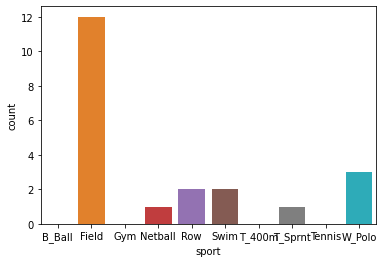

In [49]:
#bmi > 26 unique values, how often
print("BMI ding")
print(ais[ais.bmi>26])

#grafiek van de sporten enz
bmiais = ais[ais.bmi>26]
sns.countplot(x=bmiais.sport, data=bmiais)